In [1]:
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import reuters

Loaded reuters dataset consisting of 11228 news articles, split into 8982 training samples and 2246 test samples. The input is a news article with words mapped to their relative frequency, and the output is a class label between 0 and 45 indicating the news topic. 

In [3]:
(train_inputs, train_outputs), (test_inputs, test_outputs) = reuters.load_data()

In [4]:
train_inputs.shape

(8982,)

In [5]:
test_inputs.shape

(2246,)

In [6]:
train_inputs[0]

[1,
 27595,
 28842,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [7]:
train_outputs[0]

3

In [8]:
import numpy as np
DIMENSION = 10000


def one_hot_encoding(sequences, dimension = DIMENSION):
    result = np.zeros((len(sequences), dimension))
    for i in range(len(sequences)):
        for j in range(len(sequences[i])):
            if sequences[i][j] < dimension:
                result[i, sequences[i][j]] = 1
    return result

In [9]:
train_inputs = one_hot_encoding(train_inputs)
test_inputs = one_hot_encoding(test_inputs)

Set DIMENSION variable as the cutoff for word frequency in the input data; in our case, we consider only the 10000 most common words appearing in our inputs.

Transform inputs via one-hot encoding, mapping a list of integers to a vector of length DIMENSION with values 0 or 1 at the k-th entry depending upon the absence or presence of k in our list.

In [10]:
train_inputs[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [11]:
train_outputs.min(axis = 0)

0

In [12]:
train_outputs.max(axis = 0)

45

In [13]:
from keras.utils import to_categorical

In [14]:
train_outputs = to_categorical(train_outputs)
test_outputs = to_categorical(test_outputs)

In [15]:
train_outputs[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Outputs are transformed using the to_categorical utility function, mapping an integral class label k to a vector of length 46 with the k-th entry set to one and the remaining entries set to zero.

In [16]:
validation_inputs = train_inputs[0 : 3000]
reduced_train_inputs = train_inputs[3000 :]

In [17]:
validation_outputs = train_outputs[0 : 3000]
reduced_train_outputs = train_outputs[3000 :]

Set aside 3000 of the 8982 training samples as a validation set. It would be better to draw this collection randomly from our training data, rather than using the sequential approach above.

In [18]:
from keras import models
from keras import layers
from keras import regularizers

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', 
                       kernel_regularizer =  regularizers.l2(.001),
                       input_shape = (DIMENSION,)))
model.add(layers.Dense(64, activation = 'relu', 
                      kernel_regularizer= regularizers.l2(.001)))
model.add(layers.Dense(46, activation = 'softmax'))

In [20]:
model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

The network is densely connected, with two intermediate layers each having 64 nodes. In each intermediate layer, we use the rectified linear unit ('relu') activation function.

Observe the softmax activation function in our final network layer, an appropriate choice for a multiclass classification model. In addition, note the use of the categorical cross-entropy loss function and the accuracy performance metric in the .compile() parameter list.  Other performance metric choices include precision and recall.

To combat overfitting, we add regularization terms to the model, which add the norm-squared of layer weight terms to the loss function specified below.  We could instead reduce the network size or add drop-out terms to the network (see e.g. denseNN_binaryclass.ipynb).

In [21]:
EPOCHS = 20

outcome = model.fit(reduced_train_inputs, reduced_train_outputs, epochs = EPOCHS, batch_size = 256,
         validation_data = (validation_inputs, validation_outputs))

Train on 5982 samples, validate on 3000 samples
Epoch 1/20
5982/5982 [==============================] - 3s 463us/step - loss: 2.4759 - accuracy: 0.5445 - val_loss: 1.7659 - val_accuracy: 0.6427
Epoch 2/20
5982/5982 [==============================] - 1s 231us/step - loss: 1.4158 - accuracy: 0.7317 - val_loss: 1.4724 - val_accuracy: 0.7160
Epoch 3/20
5982/5982 [==============================] - 1s 229us/step - loss: 1.1122 - accuracy: 0.7982 - val_loss: 1.3564 - val_accuracy: 0.7350
Epoch 4/20
5982/5982 [==============================] - 1s 227us/step - loss: 0.9309 - accuracy: 0.8417 - val_loss: 1.2663 - val_accuracy: 0.7680
Epoch 5/20
5982/5982 [==============================] - 1s 225us/step - loss: 0.8014 - accuracy: 0.8728 - val_loss: 1.2084 - val_accuracy: 0.7820
Epoch 6/20
5982/5982 [==============================] - 1s 227us/step - loss: 0.7054 - accuracy: 0.8970 - val_loss: 1.1942 - val_accuracy: 0.7790
Epoch 7/20
5982/5982 [==============================] - 1s 228us/step - loss

In [22]:
outcome.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [23]:
epochs = range(1, EPOCHS + 1)
accuracy = outcome.history.get('accuracy')
val_accuracy = outcome.history.get('val_accuracy')

In [24]:
import matplotlib.pyplot as plt

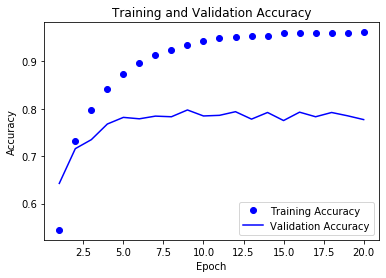

In [25]:
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The plot above shows a monotonic increase in training accuracy and an increase and mild decline in validation accuracy.  This behavior can also be seen in the callbacks generated by the .fit() method above.  The model appears to be overfitting the training data as we iterate over more and more epochs.  One way to combat this overfitting is to partially train the model, halting training at an early epoch (say, the eleventh epoch).  Further steps beyond this early stopping and our earlier use of regularization include adding drop-out terms to the network (see e.g. denseNN_binaryclass.ipynb) or decreasing the network size.  

In [26]:
model.evaluate(test_inputs, test_outputs)

2246/2246 [==============================] - 1s 253us/step


[1.2623141102778095, 0.7689225077629089]